# Word frequency analysis of studies on consciousness

## Introduction

<p> Consciousness is one of the most interesting phenomena of various branches of science including (among others) cognitive science, philosophy, psychology and neuroscience. <em>Consciousness studies</em> is a field I am particularily interested in. </p>
<p>I decided to make a comparative analysis between two groups of research papers on consciousness: experimental philosophy and neuroscience. I am specifically interested in seeing what verbs could be associated with consciousness depending on what approach is taken.  </p>

## Data collection

<p>For each group I decided to select 5 scientific papers for each compared group, 10 papers in total. My main criterion was to make sure that each text has a unique author (or a unique set of authors). </p>
<p>Neuroscientific papers:</p>
<ol>
<li>Dehaene, Stanislas, Jean-Pierre Changeux, and Lionel Naccache (2011). “The global
neuronal workspace model of conscious access: from neuronal architectures to clinical applications”. In: Characterizing consciousness: From cognition to the clinic?,
pp. 55–84.</li>
<li>Koch, Christof et al. (2016). “Neural correlates of consciousness: progress and problems”. In: Nature reviews neuroscience 17.5, pp. 307–321.</li>
<li>Kirkeby-Hinrup, A. (2024). Quantifying empirical support for theories of consciousness: a tentative methodological framework. Frontiers in Psychology, 15, 1341430.</li>
<li>Baars, B. J., & Seth, A. (2009). Theories and models of consciousness.</li>
<li>Tononi, Giulio (2004). “An information integration theory of consciousness”. In: BMC
neuroscience 5, pp. 1–22.</li>
</ol>
<p> Papers from experimental philosophy: </p>
<ol>
<li>Sytsma, Justin (2010). “Folk psychology and phenomenal consciousness”. In: Philosophy Compass 5.8, pp. 700–711.</li>
<li>Knobe, Joshua and Jesse Prinz (2008). “Intuitions about consciousness: Experimental
studies”. In: Phenomenology and the cognitive sciences 7, pp. 67–83.</li>
<li>Gray, Heather M, Kurt Gray, and Daniel M Wegner (2007). “Dimensions of mind
perception”. In: science 315.5812, pp. 619–619.</li>
<li>Arico, A., Fiala, B., Goldberg, R. F., & Nichols, S. (2011). The folk psychology of consciousness. Mind & Language, 26(3), 327-352.</li>
<li>Buckwalter, Wesley and Mark Phelan (2014). “Phenomenal consciousness disembodied”. In: Advances in Experimental Philosophy of Mind. Bloomsbury Academic,
pp. 45–73.</li>
</ol>

### Obtaining pdfs

Let us install requests library that would be necessary in order to obtain pdfs as files from the urls.

In [ ]:
!pip install requests

<p> Now we proceed with downloading the files from the list of urls I provided. </p>
 <p> Thanks to use of itertools module it was possible to name pdfs as neuro + number or philex + number respectively. </p>

In [ ]:
import itertools as it

prefix = ['neuro', 'philex']
number = [i for i in range(1, 6)]
pdf_names = [''.join(map(str, name)) for name in it.product(prefix, number)]

In [ ]:
import requests as req

urls = ["http://www.antoniocasella.eu/dnlaw/Dehaene_Changeaux_Naccache_2011.pdf",
        "https://puredhamma.net/wp-content/uploads/Neural-correlates-of-consciousness-Koch-et-al-2016.pdf",
        "https://www.frontiersin.org/journals/psychology/articles/10.3389/fpsyg.2024.1341430/pdf",
        "https://users.sussex.ac.uk/~anils/Papers/BaarsSethElsevierEncyc.pdf",
        "https://link.springer.com/content/pdf/10.1186/1471-2202-5-42.pdf",
        "https://philsci-archive.pitt.edu/5180/1/Folk_Psychology_and_Phenomenal_Consciousness.pdf",
        "https://bpb-us-w2.wpmucdn.com/campuspress.yale.edu/dist/3/1454/files/2016/02/consciousness-2ftbcna.pdf",
        "https://dtg.sites.fas.harvard.edu/DANWEGNER/pub/Gray,%20Gray,%20&%20Wegner%20(2007).pdf",
        "https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=212f7a712f0a370d1f642af1535400f0d145f2a4",
        "https://www.dirzon.com/file/telegram/Books%20and%20You/ADVANCES%20IN%20EXPERIMENTAL%20PHILOSOPHY%20OF%20MIND.pdf#page=56"]

i = 0
for url in urls:
  response = req.get(url)
  file_path = pdf_names[i] + '.pdf'
  if response.status_code == 200:
    with open(file_path, 'wb') as file:
        file.write(response.content)
    print(f"File " + file_path + " was downloaded successfully")
  else:
    print(f"Failed to download file " + file_path)
  i += 1

File neuro1.pdf was downloaded successfully
File neuro2.pdf was downloaded successfully
File neuro3.pdf was downloaded successfully
File neuro4.pdf was downloaded successfully
File neuro5.pdf was downloaded successfully
File philex1.pdf was downloaded successfully
File philex2.pdf was downloaded successfully
File philex3.pdf was downloaded successfully
File philex4.pdf was downloaded successfully
File philex5.pdf was downloaded successfully


### Extracting text from pdfs

In order to extract text from pdfs we will use PyPDF2 library.

In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 37.8 MB/s eta 0:00:00


Now we can define a function that would extract text from each pdf.

In [ ]:
import PyPDF2

def extract_text(pdf_file):
  with open(pdf_file, 'rb') as pdf:
    reader = PyPDF2.PdfReader(pdf)
    text = []

    for page in reader.pages:
      content = page.extract_text()
      # The extract_text method makes unwanted "\n" that can be removed
      cleaned_content = content.replace('\n', ' ')
      text.append(cleaned_content)

    return " ".join(text)

Hence it is possible to extract text from each pdf into a string.

In [ ]:
extracted_texts = {key: extract_text(key+".pdf") for key in pdf_names}

In [ ]:
print(extracted_texts)

{'neuro1': 'The Global Neuronal Workspace Model of Conscious Access: From Neuronal Architectures to Clinical Applications Stanislas Dehaene, Jean-Pierre Changeux, and Lionel Naccache Abstract While a considerable body of experimental data has been accumulated on the differences between conscious and non-conscious processing, a theory isneeded to bridge the neuro-psychological gap and establish a causal relationshipbetween objective neurophysiological data and subjective reports. In the presentreview, we ﬁrst brieﬂy outline the detailed postulates and predictions of ourworking hypothesis, referred to as the global neuronal workspace (GNW) model. We then compare these predictions to experimental studies that have attempted to delineate the physiological signatures of conscious sensory perception bycontrasting it with subliminal processing, using a variety of methods: behavioral,PET and fMRI imaging, time-resolved imaging with ERP and MEG, and ﬁnallysingle-cell electrophysiology. In a ﬁna

## Data preprocessing

### Cleaning

In the previous section we obtained a dictionary of texts (strings). Now, with the use of regular expressions library we will proceed with some adjustments that are often used in natural language processing, namely:
<ol>
<li> All upper case letters shall be converted to lowercase </li>
<li> All links shall be removed </li>
<li> All numbers and punctuation shall be removed so that only letters remain</li>
<li> Contractions shall be removed </li>
<li> Single letters shall be removed </li>
<li> Trailing whitespace shall be replaced with regular space </li>
</ol>

In order to remove contractions an additional library could be useful:

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.8 MB/s eta 0:00:00


Now, let us define the function:

In [ ]:
import re
import contractions

def clean_text(text):
  # convert to lowercase
  text = text.lower()
  # remove links
  text = re.compile(r"https?://\S+|www\.\S+").sub("", text)
  # remove all non-letters
  text = re.sub(r"[^a-z\ ]", "", text)
  # remove contractions and 's
  text = " ".join([contractions.fix(word) for word in text.split()])
  text = re.sub("'s\b", "", text)
  # remove single letters
  text = re.sub(r"\b[a-z]\b", "", text)
  # remove whitespace
  text = re.sub("\s+", " ", text)
  text = text.strip()
  return text


A dictionary of cleaned texts can be made:

In [ ]:
cleaned_texts = {key: clean_text(extracted_texts.get(key)) for key in extracted_texts.keys()}

### Tokenisation
In order to obtain tokens from strings spacy library is required:

In [ ]:
!pip install spacy

^C


Once the spacy library is installed this very basic function can be made:

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
def tokenize_text(text):
  doc = nlp(text)
  return doc

Now, we can change words into tokens:

In [ ]:
tokenized_texts = {key: tokenize_text(cleaned_texts.get(key)) for key in cleaned_texts.keys()}

### Removing stop words
Stop words are defined as some common or auxiliary words that are not taken into account in a text analysis. First, let us have a list of stopwords in English language:

I decided to add "et" and "al" which are very common in scientific papers (<em> et al.</em>). On a similar basis I decided to remove "conscious" and "consciousness" since both of these word will probably be most present in all papers.

(Source of the original list: https://gist.github.com/sebleier/554280)

In [ ]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you",
              "your", "yours", "yourself", "yourselves", "he", "him", "his",
              "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which",
              "who", "whom", "this", "that", "these", "those", "am", "is",
              "are", "was", "were", "be", "been", "being", "have", "has", "had",
              "having", "do", "does", "did", "doing", "a", "an", "the", "and",
              "but", "if", "or", "because", "as", "until", "while", "of", "at",
              "by", "for", "with", "about", "against", "between", "into",
              "through", "during", "before", "after", "above", "below", "to",
              "from", "up", "down", "in", "out", "on", "off", "over", "under",
              "again", "further", "then", "once", "here", "there", "when",
              "where", "why", "how", "all", "any", "both", "each", "few",
              "more", "most", "other", "some", "such", "no", "nor", "not",
              "only", "own", "same", "so", "than", "too", "very", "s","t",
              "can", "will", "just", "don", "should", "now", "et", "al",
              "conscious", "consciousness"]

In order to remove stop words from a text a new function could be introduced:



In [ ]:
def remove_stop_words(stop_words, text):
  remaining_words = [word for word in text if word.text not in stop_words]
  return remaining_words

The function above could be applied to each tokenized text:

In [ ]:
preprocessed_texts = {key: remove_stop_words(stop_words, tokenized_texts.get(key)) for key in tokenized_texts.keys()}

## Word frequency analysis

### Conversion to csv
Before making the proper analysis it is essential to transform the dictionary of preprocessed texts into a csv file that could be later analyzed as a data frame:

In [ ]:
import csv

with open('text_data.csv', mode='w', newline='') as file:
  writer = csv.writer(file)

  # Make names of the columns:
  writer.writerow(["Word", "Paper"])
  # we are making two loops: iterating in a dictionary and in lists of strings
  for key, texts in preprocessed_texts.items():
    for word in texts:
      writer.writerow([word, key])

### Analysis of the data frame
Now, a data frame can be made:

In [ ]:
import pandas as pd

data =  pd.read_csv("text_data.csv")

### Frequency of words analysis
<p>Now for each text we will measure frequency of words with a function that will display first n most common words:</p>


In [ ]:
def count_words(df, text_id, n):
  words = df.loc[data.Paper == text_id]
  counted_words = words["Word"].value_counts().reset_index()
  # start from 1st place not 0
  counted_words.index = range(1, len(counted_words) + 1)
  return counted_words.head(n)

For each paper a word cloud will be generated

In [ ]:
!pip install wordCloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_cloud(paper_id, text_dict):
  tokens = text_dict.get(paper_id)
  words = " ".join([token.text for token in tokens])
  wordcloud = WordCloud(width=800, height=400, background_color="white").generate(words)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()


#### Neuroscientific papers

Dehaene, Stanislas, Jean-Pierre Changeux, and Lionel Naccache (2011). “The global neuronal workspace model of conscious access: from neuronal architectures to clinical applications”. In: Characterizing consciousness: From cognition to the clinic?, pp. 55–84.

In [ ]:
df_neuro1 = count_words(data, "neuro1", 10)
df_neuro1

Word  count
1      dehaene     84
2       cortex     71
3       access     61
4        brain     56
5          gnw     55
6       visual     54
7   processing     48
8        areas     47
9     cortical     45
10      global     42

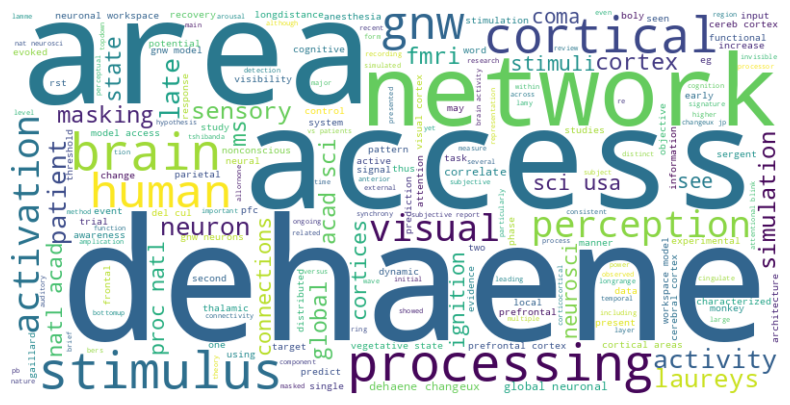

In [ ]:
plot_cloud("neuro1", preprocessed_texts)

Koch, Christof et al. (2016). “Neural correlates of consciousness: progress and problems”. In: Nature reviews neuroscience 17.5, pp. 307–321.

In [ ]:
df_neuro2 = count_words(data, "neuro2", 10)
df_neuro2

Word  count
1     activity    100
2       visual    100
3       cortex     96
4        brain     92
5       neural     77
6     cortical     61
7         etal     59
8   correlates     56
9        sleep     52
10         ncc     51

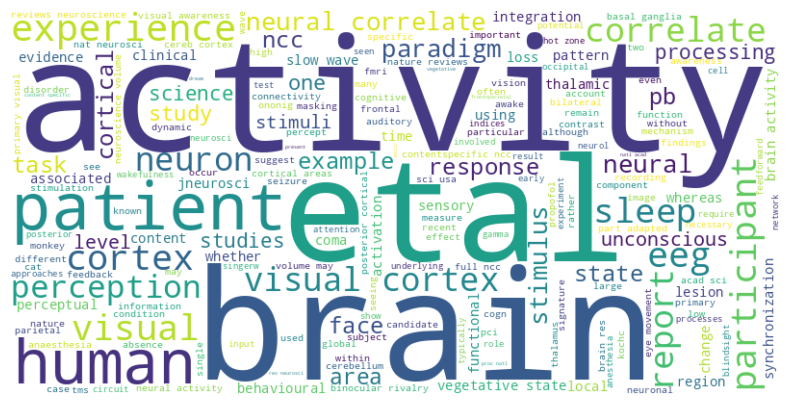

In [ ]:
plot_cloud("neuro2", preprocessed_texts)

Kirkeby-Hinrup, A. (2024). Quantifying empirical support for theories of consciousness: a tentative methodological framework. Frontiers in Psychology, 15, 1341430.


In [ ]:
df_neuro3 = count_words(data, "neuro3", 10)
df_neuro3

Word  count
1       theory    159
2     theories    127
3     evidence    114
4    empirical    106
5          one     70
6          doi     64
7      support     59
8      ordinal     52
9   phenomenon     51
10    proposed     49

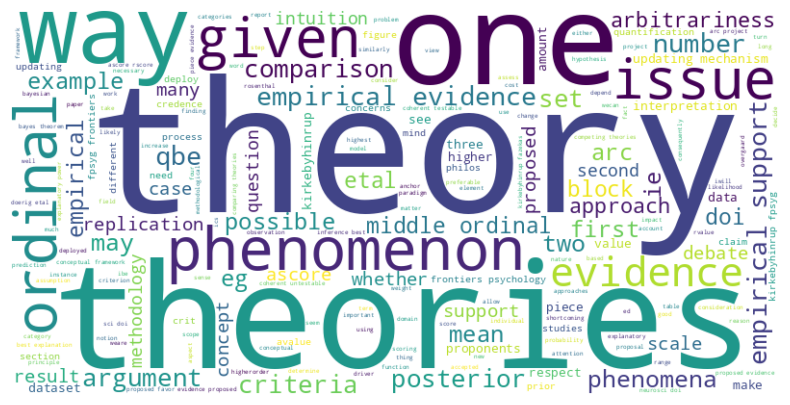

In [ ]:
plot_cloud("neuro3", preprocessed_texts)

Baars, B. J., & Seth, A. (2009). Theories and models of consciousness.

In [ ]:
df_neuro4 = count_words(data, "neuro4", 10)
df_neuro4

Word  count
1      brain     28
2     neural     27
3   activity     24
4        may     18
5   neuronal     17
6     visual     16
7     system     16
8    regions     16
9     global     15
10  features     13

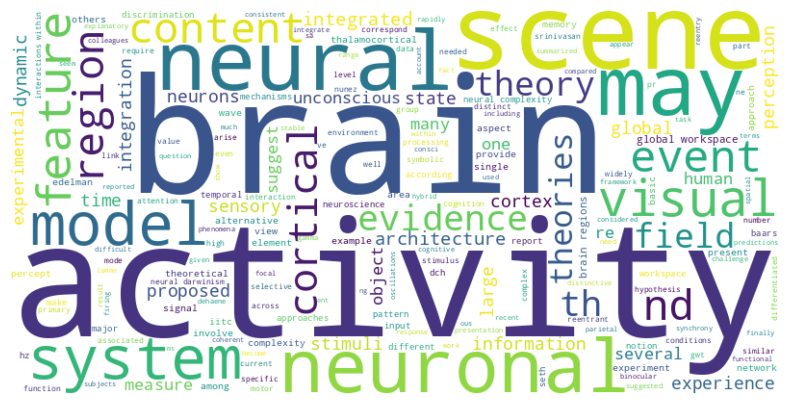

In [ ]:
plot_cloud("neuro4", preprocessed_texts)

Tononi, Giulio (2004). “An information integration theory of consciousness”. In: BMC neuroscience 5, pp. 1–22.

In [ ]:
df_neuro5 = count_words(data, "neuro5", 10)
df_neuro5

Word  count
1       complex    142
2   information    135
3      elements     98
4        system     88
5    experience     81
6          main     71
7         brain     68
8   integration     61
9     different     55
10          may     50

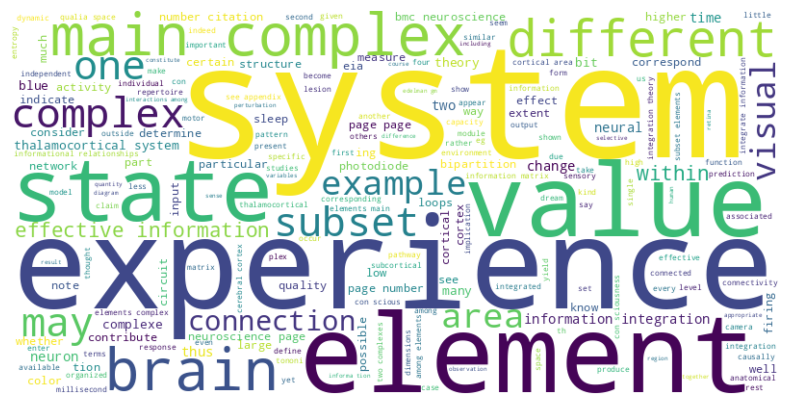

In [ ]:
plot_cloud("neuro5", preprocessed_texts)

#### Papers from experimental philosophy

Sytsma, Justin (2010). “Folk psychology and phenomenal consciousness”. In: Philosophy Compass 5.8, pp. 700–711.

In [ ]:
df_philex1 = count_words(data, "philex1", 10)
df_philex1

Word  count
1         states    120
2         mental    107
3           folk     76
4   phenomenally     51
5   philosophers     50
6         sytsma     39
7       classify     27
8        whether     27
9            two     25
10       feeling     25

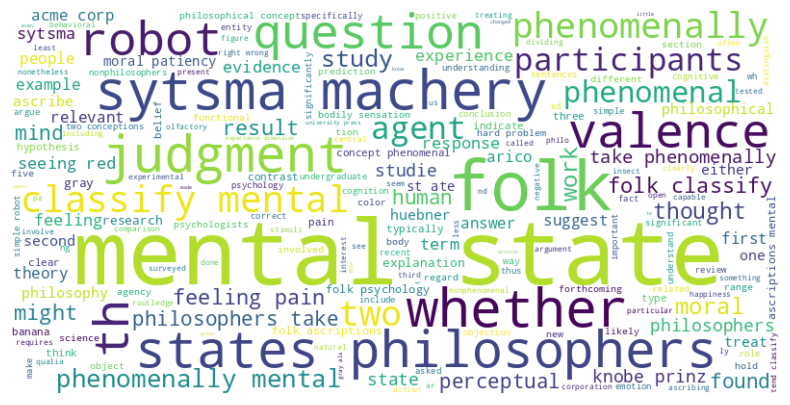

In [ ]:
plot_cloud("philex1", preprocessed_texts)

Knobe, Joshua and Jesse Prinz (2008). “Intuitions about consciousness: Experimental studies”. In: Phenomenology and the cognitive sciences 7, pp. 67–83.

In [ ]:
df_philex2 = count_words(data, "philex2", 10)
df_philex2

Word  count
1        states     91
2        people     86
3    phenomenal     70
4   ascriptions     55
5        mental     51
6         would     46
7         group     41
8       ascribe     40
9         might     39
10       agents     37

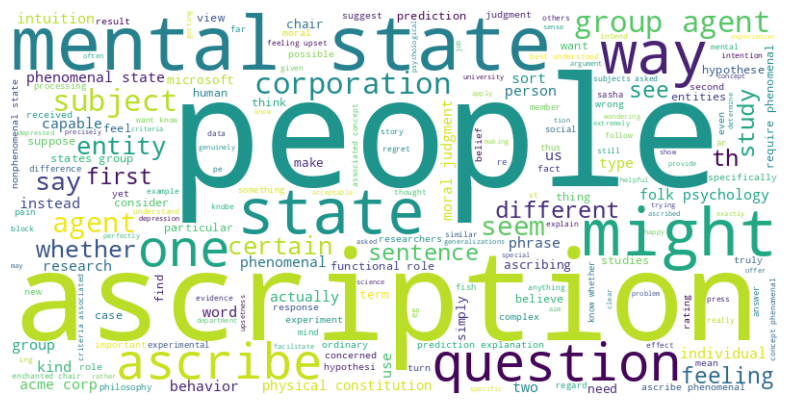

In [ ]:
plot_cloud("philex2", preprocessed_texts)

Gray, Heather M, Kurt Gray, and Daniel M Wegner (2007). “Dimensions of mind perception”. In: science 315.5812, pp. 619–619.

In [ ]:
df_philex3 = count_words(data, "philex3", 10)
df_philex3

Word  count
1         mind     17
2   dimensions     11
3   perception      9
4      science      8
5   characters      8
6          one      8
7       agency      7
8   experience      6
9       online      6
10       moral      5

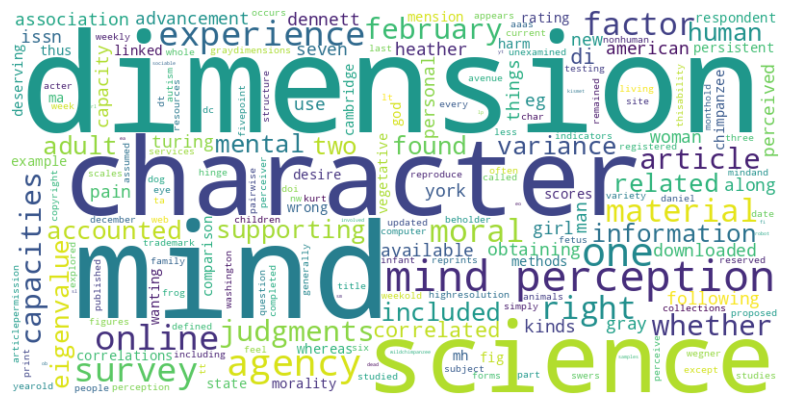

In [ ]:
plot_cloud("philex3", preprocessed_texts)

Arico, A., Fiala, B., Goldberg, R. F., & Nichols, S. (2011). The folk psychology of consciousness. Mind & Language, 26(3), 327-352.

In [ ]:
df_philex4 = count_words(data, "philex4", 10)
df_philex4

Word  count
1         states    133
2         agency     68
3      attribute     67
4          agent     58
5         plants     55
6         mental     48
7          model     46
8   attributions     38
9            one     37
10        object     36

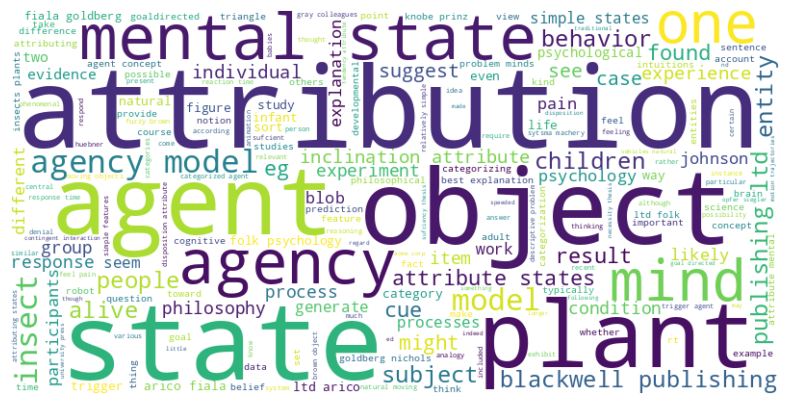

In [ ]:
plot_cloud("philex4", preprocessed_texts)

Buckwalter, Wesley and Mark Phelan (2014). “Phenomenal consciousness disembodied”. In: Advances in Experimental Philosophy of Mind. Bloomsbury Academic, pp. 45–73.

In [ ]:
df_philex5 = count_words(data, "philex5", 10)
df_philex5

Word  count
1     philosophy    317
2           pain    305
3          moral    303
4   experimental    249
5           mind    249
6   participants    246
7            one    212
8      intuition    208
9         states    208
10        people    202

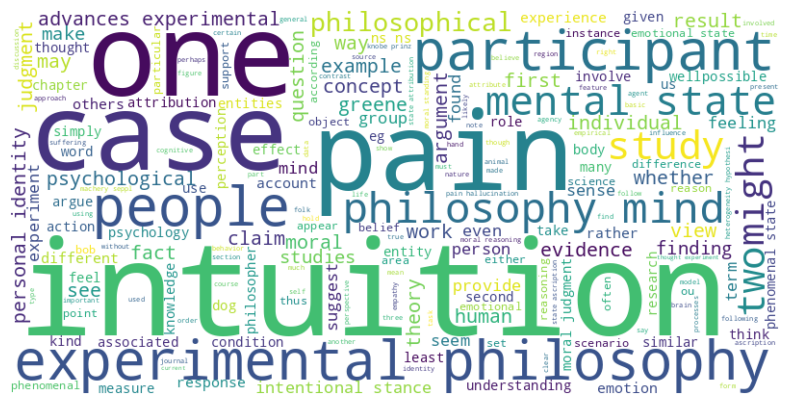

In [ ]:
plot_cloud("philex5", preprocessed_texts)

## Comparative analysis

Let us make two separate datasets: neuroscientific and philosophical.

In [ ]:
df_neuro = data[data['Paper'].apply(lambda x: bool(re.match(r'^neuro', x)))]
df_philex = data[data['Paper'].apply(lambda x: bool(re.match(r'^philex', x)))]

index           Word    Paper
0      37639           folk  philex1
1      37640     psychology  philex1
2      37641     phenomenal  philex1
3      37642         justin  philex1
4      37643         sytsma  philex1
...      ...            ...      ...
59542  97181       williams  philex5
59543  97182     williamson  philex5
59544  97183  williamsstyle  philex5
59545  97184           case  philex5
59546  97185           oung  philex5

[59547 rows x 3 columns]

We can calculate TD-IDF metric to state which words are common across documents and which are unique for a document:

In [241]:
from collections import Counter
import math # needed to calculate logarithm

def calculate_tf(df):
  tf_dict = {}
  # we group according to paper id
  papers = df.groupby("Paper")
  for paper, group in papers:
    word_counts = Counter(group["Word"])
    all_words = len(group["Word"])
    tf_dict[paper] = {word: count / all_words for word, count in word_counts.items()}
  return tf_dict

def calculate_idf(df):
  all_papers = df["Paper"].nunique()
  word_paper_counts = df.groupby("Word")["Paper"].nunique()
  idf_dict = {word: math.log(all_papers / (1 + paper_count)) for word, paper_count in word_paper_counts.items()}
  return idf_dict

def calculate_tdidf(df):
  tf_dict = calculate_tf(df)
  idf_dict = calculate_idf(df)
  tfidf_rows = []
  for paper, tf_values in tf_dict.items():
    for word, tf_value in tf_values.items():
        # tf-idf = tf * idf
        tfidf_value = tf_value * idf_dict[word]
        tfidf_rows.append([word, paper, tfidf_value])
  return pd.DataFrame(tfidf_rows, columns=["Word", "Paper", "TF-IDF"])



Let us apply this metric for various comparisons:
### Between neurocientific papers:

Common words across documents (low TF-IDF):

In [242]:
df_neuro = df_neuro.dropna(subset=["Word"])
calculate_tdidf(df_neuro).sort_values(by='TF-IDF', ascending = True).head(10)

Word   Paper    TF-IDF
6221       theory  neuro3 -0.003563
9966      complex  neuro5 -0.002647
6227     evidence  neuro3 -0.002555
9880  information  neuro5 -0.002517
6186    empirical  neuro3 -0.002375
3142     activity  neuro2 -0.002069
3216       visual  neuro2 -0.002069
8572        brain  neuro4 -0.002005
3146       cortex  neuro2 -0.001986
8558       neural  neuro4 -0.001933

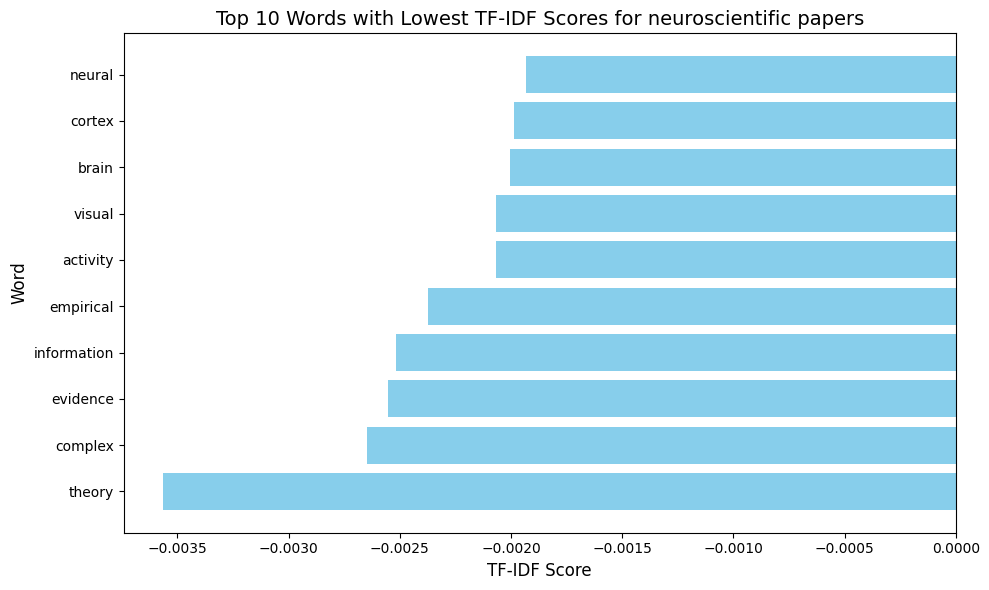

In [256]:
plot_data = calculate_tdidf(df_neuro).sort_values(by='TF-IDF', ascending = True).head(10)
plt.figure(figsize=(10, 6))
plt.barh(plot_data["Word"], plot_data["TF-IDF"], color="skyblue")
plt.xlabel("TF-IDF Score", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.title("Top 10 Words with Lowest TF-IDF Scores for neuroscientific papers", fontsize=14)
plt.tight_layout()
plt.show()


Distinctive words among documents (high TF-IDF):

In [ ]:
calculate_tdidf(df_neuro).sort_values(by='TF-IDF', ascending = False).head(10)

Word   Paper    TF-IDF
7563         ordinal  neuro3  0.005856
3153             ncc  neuro2  0.005302
7254             qbe  neuro3  0.004730
6724             arc  neuro3  0.004617
6364   kirkebyhinrup  neuro3  0.004505
9871            page  neuro5  0.004123
6375             doi  neuro3  0.004018
6283        updating  neuro3  0.003717
10685      complexes  neuro5  0.003561
5236            etal  neuro2  0.003420

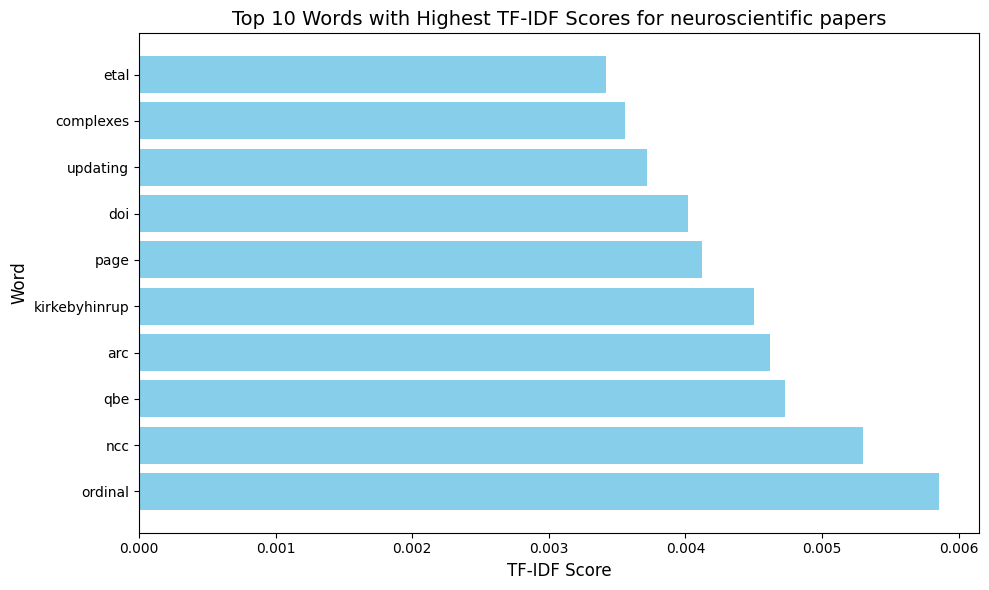

In [248]:
plot_data = calculate_tdidf(df_neuro).sort_values(by='TF-IDF', ascending = False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(plot_data["Word"], plot_data["TF-IDF"], color="skyblue")
plt.xlabel("TF-IDF Score", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.title("Top 10 Words with Highest TF-IDF Scores for neuroscientific papers", fontsize=14)
plt.tight_layout()
plt.show()

### Philosophical papers
Common words:

In [ ]:
df_philex = df_philex.dropna(subset=["Word"])
calculate_tdidf(df_philex).sort_values(by='TF-IDF', ascending = True).head(10)

Word    Paper    TF-IDF
24        mental  philex1 -0.005801
3004        mind  philex3 -0.005372
3057  dimensions  philex3 -0.003476
1289      people  philex2 -0.002897
3005  perception  philex3 -0.002844
3088         one  philex3 -0.002528
3001     science  philex3 -0.002528
3244      agency  philex3 -0.002212
3404      agency  philex4 -0.001866
1294      mental  philex2 -0.001718

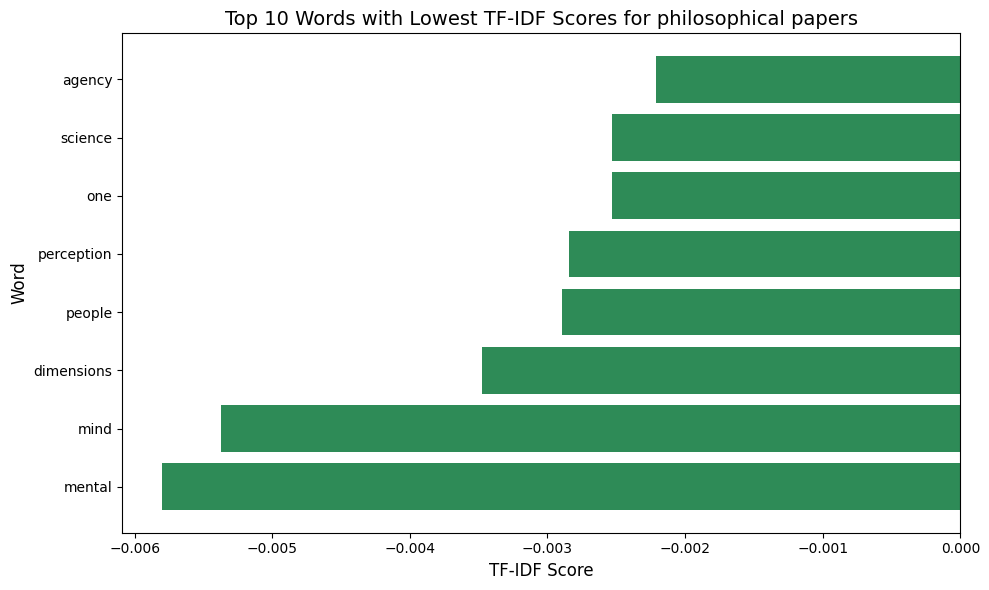

In [252]:
plot_data = calculate_tdidf(df_philex).sort_values(by='TF-IDF', ascending = True).head(10)
plt.figure(figsize=(10, 6))
plt.barh(plot_data["Word"], plot_data["TF-IDF"], color="seagreen")
plt.xlabel("TF-IDF Score", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.title("Top 10 Words with Lowest TF-IDF Scores for philosophical papers", fontsize=14)
plt.tight_layout()
plt.show()

Disinctive words:

In [ ]:
calculate_tdidf(df_philex).sort_values(by='TF-IDF', ascending = False).head(10)

Word    Paper    TF-IDF
3008     february  philex3  0.006352
3012      article  philex3  0.003541
3405        model  philex4  0.003537
315       valence  philex1  0.003342
3030    obtaining  philex3  0.003176
3037  advancement  philex3  0.003176
3049         issn  philex3  0.003176
3070       turing  philex3  0.003176
3148   persistent  philex3  0.003176
3364           mh  philex3  0.003176

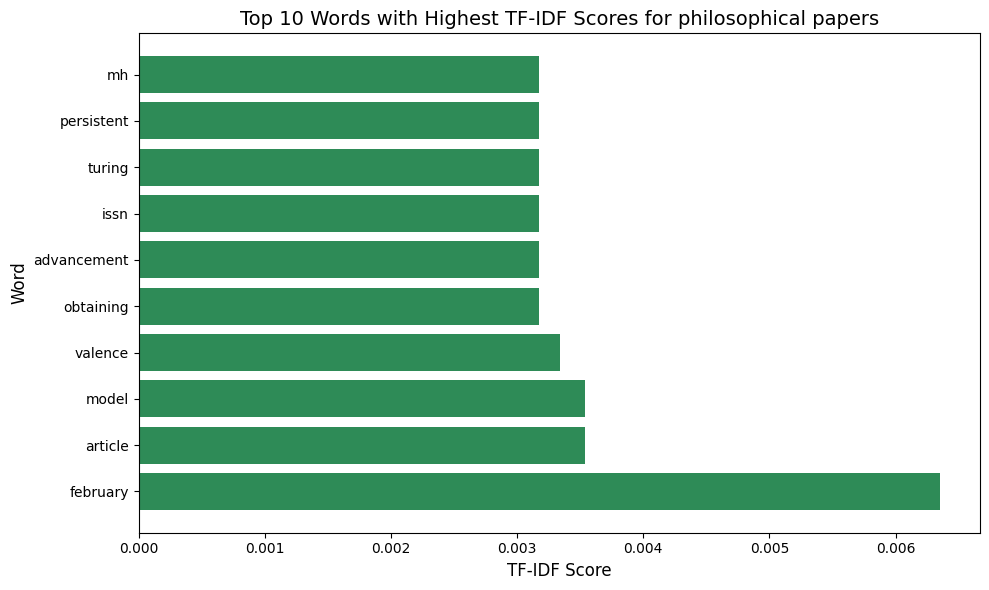

In [253]:
plot_data = calculate_tdidf(df_philex).sort_values(by='TF-IDF', ascending = False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(plot_data["Word"], plot_data["TF-IDF"], color="seagreen")
plt.xlabel("TF-IDF Score", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.title("Top 10 Words with Highest TF-IDF Scores for philosophical papers", fontsize=14)
plt.tight_layout()
plt.show()

### Across all papers
Common words:

In [ ]:
df = data.dropna(subset=["Word"])
calculate_tdidf(df).sort_values(by='TF-IDF', ascending = True).head(10)

Word    Paper    TF-IDF
15879   perception  philex3 -0.001487
15875      science  philex3 -0.001321
15962          one  philex3 -0.001321
9880   information   neuro5 -0.001316
8572         brain   neuro4 -0.001048
3124         brain   neuro2 -0.000995
6648           one   neuro3 -0.000820
14372        would  philex2 -0.000810
12906      whether  philex1 -0.000765
12932          two  philex1 -0.000709

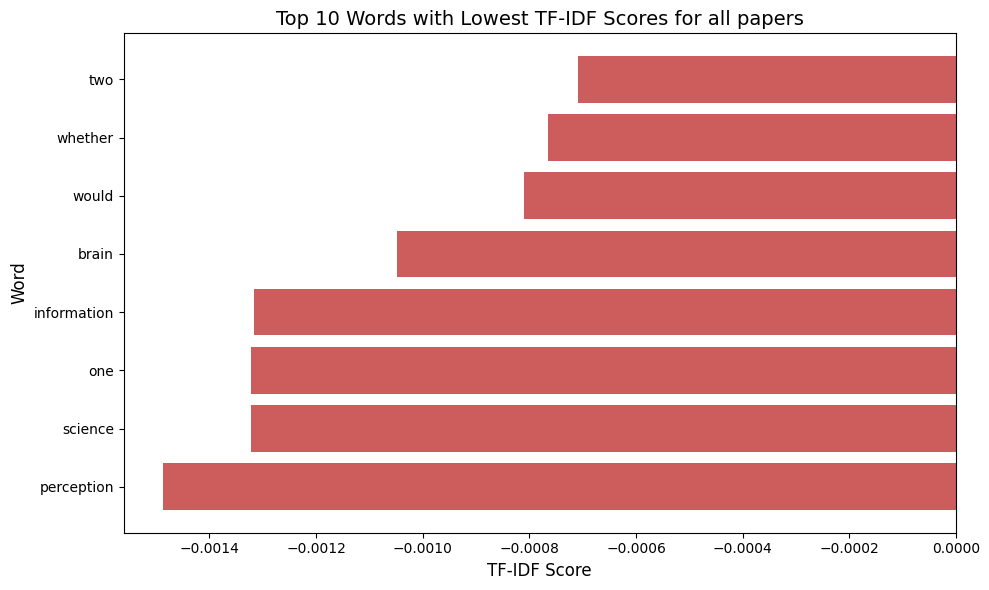

In [254]:
plot_data = calculate_tdidf(df).sort_values(by='TF-IDF', ascending = True).head(10)
plt.figure(figsize=(10, 6))
plt.barh(plot_data["Word"], plot_data["TF-IDF"], color="indianred")
plt.xlabel("TF-IDF Score", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.title("Top 10 Words with Lowest TF-IDF Scores for all papers", fontsize=14)
plt.tight_layout()
plt.show()

Distinctive words

In [243]:
calculate_tdidf(df).sort_values(by='TF-IDF', ascending = False).head(10)

Word    Paper    TF-IDF
12874          folk  philex1  0.015664
12878        sytsma  philex1  0.010626
12903  phenomenally  philex1  0.010512
7563        ordinal   neuro3  0.010286
15996    characters  philex3  0.009610
3153            ncc   neuro2  0.009314
16300     attribute  philex4  0.009242
15882      february  philex3  0.008346
7254            qbe   neuro3  0.008308
6724            arc   neuro3  0.008110

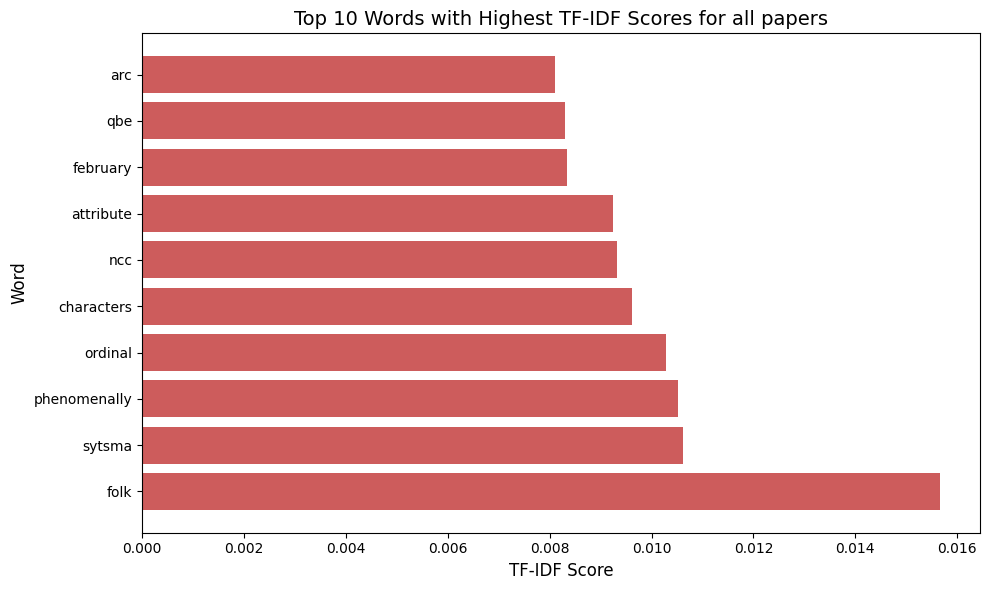

In [255]:
plot_data = calculate_tdidf(df).sort_values(by='TF-IDF', ascending = False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(plot_data["Word"], plot_data["TF-IDF"], color="indianred")
plt.xlabel("TF-IDF Score", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.title("Top 10 Words with Highest TF-IDF Scores for all papers", fontsize=14)
plt.tight_layout()
plt.show()

## Conclusion and evaluation

Based on the word frequency analysis and comparative analysis some interesting insights can be deduced:


*   It is not surprising that many words associated with neuroscience are frequent in neuroscientific papers, namely "brain", "neural" and "activity"
*   In some papers name of the author was frequently brought up (Dehaene)
*   In philosophical papers the very common words were "philosophers", "mental" and "phenomenal"
*   According to TF-IDF metric words such as "theory", "complex" and "evidence" reached higher scores as they were common in most of the papers while the lowest points were given to non-existent words (possible mistakes in pdf parsing) and abbreviations (ncc)
*   Across philosophical papers "mental", "mind", "dimensions" were frequent with high score while the least points were given to the word "february" (I am unaware of the context where it was used)
*   The highest scores across all documents were given to "perception" and "science" which are common for both neuroscience and philosophy


Possible limitations:
*   Mistakes in pdf parsing resulting in non-existent words
*   Low sample of papers
*   There were no precise criteria in selecting the papers
*   There could have been some stop words that were not present in the list

